# Covid-19 Prediction based on symptoms

## Introduction
A speedy and accurate diagnosis of COVID-19 is made possible by effective SARS-CoV-2 screening, which can also lessen the burden on healthcare systems. There have been built prediction models that assess the likelihood of infection by combining a number of parameters. These are meant to help medical professionals all over the world treat patients, especially in light of the scarcity of healthcare resources. The current dataset has been downloaded from ‘ABC’ government website and contains around 2,78,848 individuals who have gone through the RT-PCR test. Data set contains 11 columns, including 8 features suspected to play an important role in the prediction of COVID19 outcome. Outcome variable is covid result test positive or negative. We have data from 11th March 2020 till 30th April 2020. Please consider 11th March till 15th April as a training and validation set. From 16th April till 30th April as a test set. Please further divide training and validation set at a ratio of 4:1.  

## Aim:
- Perform all appropriate feature engineering tasks.
- Perform important data visualization techniques to find the pattern in data.
- Report characteristics of important features, such as total number and percentage of each category in a table format after performing all relevant tasks.
- Perform multiple machine learning models relevant to your hypothesis, justify your model.
- Perform important cost functions to justify which model is better.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")

### EDA

In [2]:
df_raw = pd.read_csv('./corona_tested_006.csv')
df = df_raw.copy()

In [3]:
df.shape

(278848, 11)

In [4]:
df.head()

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,11-03-2020,True,False,True,False,False,negative,NaN,NaN,Abroad
1,2,11-03-2020,False,True,False,False,False,positive,NaN,NaN,Abroad
2,3,11-03-2020,False,True,False,False,False,positive,NaN,NaN,Abroad
3,4,11-03-2020,True,False,False,False,False,negative,NaN,NaN,Abroad
4,5,11-03-2020,True,False,False,False,False,negative,NaN,NaN,Contact with confirmed


In [5]:
df.describe(include='all')

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
count,278848.000000,278848,278596,278596,278847,278847,278847,278848,151528,259285,278848
unique,NaN,51,2,2,2,2,2,3,2,2,3
top,NaN,20-04-2020,False,False,False,False,False,negative,No,female,Other
freq,NaN,10921,236368,256844,276921,277270,276433,260227,125703,130158,242741
mean,139424.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,80496.628269,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,69712.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,139424.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,209136.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Dealing with Missing Values

In [6]:
df.duplicated().sum()

0

In [7]:
df.dtypes

Ind_ID                  int64
Test_date              object
Cough_symptoms         object
Fever                  object
Sore_throat            object
Shortness_of_breath    object
Headache               object
Corona                 object
Age_60_above           object
Sex                    object
Known_contact          object
dtype: object

In [8]:
df.isna().sum() / len(df) * 100

Ind_ID                  0.000000
Test_date               0.000000
Cough_symptoms          0.090372
Fever                   0.090372
Sore_throat             0.000359
Shortness_of_breath     0.000359
Headache                0.000359
Corona                  0.000000
Age_60_above           45.659284
Sex                     7.015650
Known_contact           0.000000
dtype: float64

In [9]:
df.dropna(subset=['Cough_symptoms', 'Fever', 'Sex'], axis=0, inplace=True)

In [10]:
df.isna().sum()

Ind_ID                      0
Test_date                   0
Cough_symptoms              0
Fever                       0
Sore_throat                 0
Shortness_of_breath         0
Headache                    0
Corona                      0
Age_60_above           120870
Sex                         0
Known_contact               0
dtype: int64

### Drop the un-necessary features

In [11]:
df.drop('Ind_ID', axis=1, inplace=True)

In [12]:
df.Sex.value_counts()

Sex
female    130030
male      129012
Name: count, dtype: int64

In [13]:
for col in df.columns[1:]:
    print(df[col].value_counts())
    print('----------------------')

Cough_symptoms
False    219387
True      39655
Name: count, dtype: int64
----------------------
Fever
False    238848
True      20194
Name: count, dtype: int64
----------------------
Sore_throat
False    257523
True       1519
Name: count, dtype: int64
----------------------
Shortness_of_breath
False    257943
True       1099
Name: count, dtype: int64
----------------------
Headache
False    256914
True       2128
Name: count, dtype: int64
----------------------
Corona
negative    242136
positive     13532
other         3374
Name: count, dtype: int64
----------------------
Age_60_above
No     114092
Yes     24080
Name: count, dtype: int64
----------------------
Sex
female    130030
male      129012
Name: count, dtype: int64
----------------------
Known_contact
Other                     225638
Abroad                     23665
Contact with confirmed      9739
Name: count, dtype: int64
----------------------


### Data Vizualization

<Axes: xlabel='Sex'>

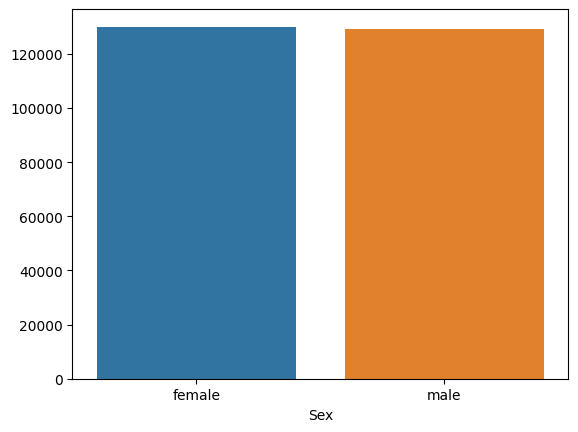

In [14]:
sns.barplot(x= df.Sex.value_counts().index,
            y= df.Sex.value_counts().values)

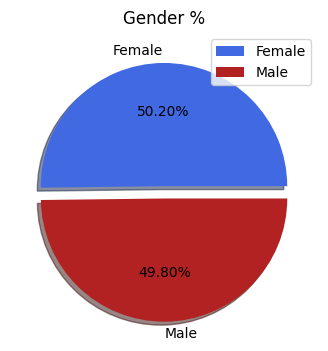

In [15]:
# pie chart to display gender column

labels = ['Female', 'Male']
size = df['Sex'].value_counts()
colors = ['royalblue', 'firebrick']
explode = [0, 0.1]

plt.rcParams['figure.figsize'] = (4, 4)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Gender %', fontsize = 12)
plt.axis('off')
plt.legend()
plt.show()


In [16]:
# check corona column
df['Corona'].value_counts()

Corona
negative    242136
positive     13532
other         3374
Name: count, dtype: int64

In [17]:
# drop data with corona as other.
df = df[df['Corona'] != 'other']
df['Corona'].value_counts()


Corona
negative    242136
positive     13532
Name: count, dtype: int64

<Axes: xlabel='Corona'>

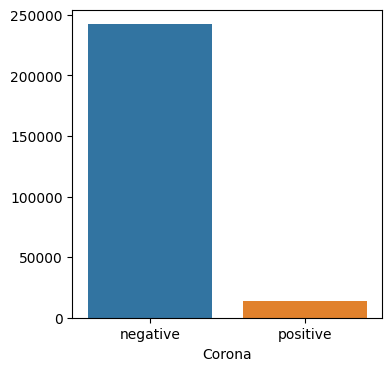

In [18]:
sns.barplot(x= df.Corona.value_counts().index,
            y= df.Corona.value_counts().values)

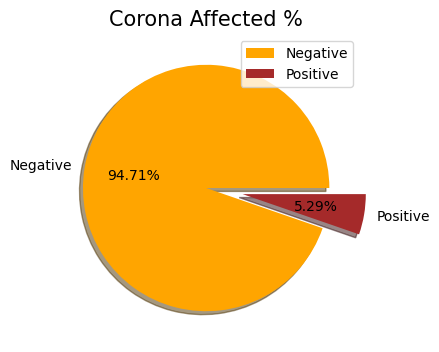

In [19]:
# pie chart for corona column
labels = ['Negative', 'Positive']
size = df['Corona'].value_counts()
colors = ['orange', 'brown']
explode = [0, 0.3]

plt.rcParams['figure.figsize'] = (4, 4)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Corona Affected %', fontsize = 15)
plt.axis('off')
plt.legend()
plt.show()

Text(0, 0.5, 'No. of Patients')

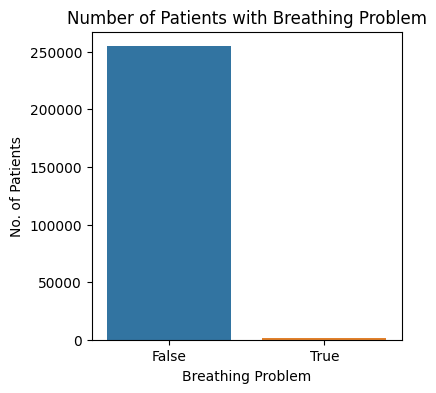

In [20]:
sns.countplot(x='Shortness_of_breath',data=df)
plt.title('Number of Patients with Breathing Problem')
plt.xlabel('Breathing Problem')
plt.ylabel('No. of Patients')

<Axes: xlabel='Shortness_of_breath', ylabel='count'>

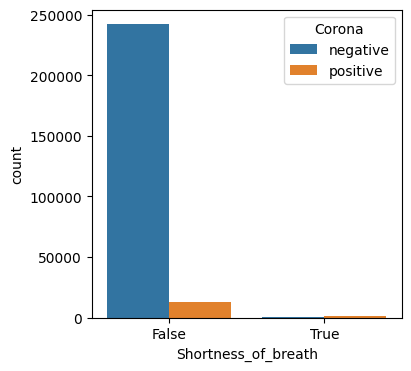

In [21]:
sns.countplot(x='Shortness_of_breath',hue='Corona',data=df)

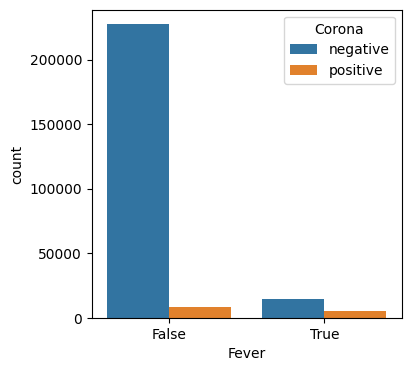

In [22]:
sns.countplot(x='Fever',hue='Corona',data=df);

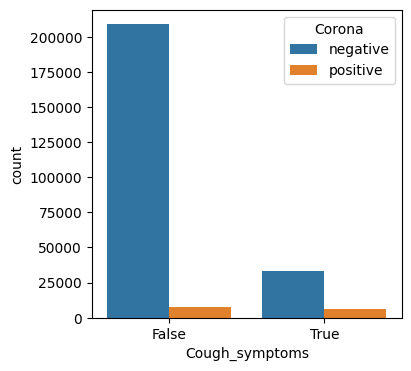

In [23]:
sns.countplot(x='Cough_symptoms',hue='Corona',data=df);

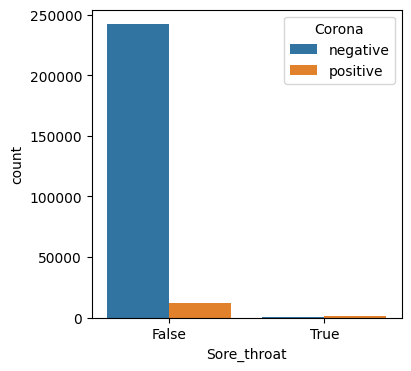

In [24]:
sns.countplot(x='Sore_throat',hue='Corona',data=df);

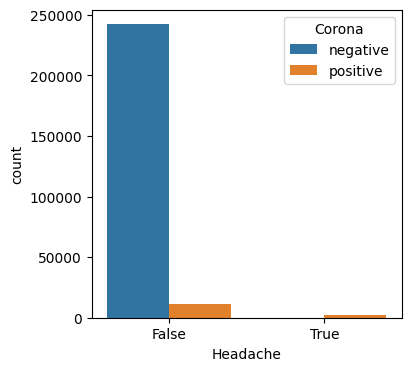

In [25]:
sns.countplot(x='Headache',hue='Corona',data=df);

### Feature Encoding

In [26]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()

In [50]:
df['Cough_symptoms'] = label_encoder.fit_transform(df['Cough_symptoms'])
df['Fever'] = label_encoder.fit_transform(df['Fever'])
df['Sore_throat'] = label_encoder.fit_transform(df['Sore_throat'])
df['Shortness_of_breath'] = label_encoder.fit_transform(df['Shortness_of_breath'])
df['Headache'] = label_encoder.fit_transform(df['Headache'])
df['Corona'] = label_encoder.fit_transform(df['Corona'])
df['Sex'] = label_encoder.fit_transform(df['Sex'])
df['Known_contact'] = label_encoder.fit_transform(df['Known_contact'])

{1: 1, 0: 0}


In [28]:
df.head()

,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
13727,22-03-2020,1,0,0,0,0,0,No,1,0
13728,22-03-2020,1,0,0,0,0,0,No,0,0
13730,22-03-2020,1,1,0,0,0,1,Yes,0,2
13734,22-03-2020,0,0,0,0,0,0,No,1,2
13735,22-03-2020,0,0,0,0,0,0,No,0,2


In [29]:
df.dtypes.value_counts()

int64     8
object    2
Name: count, dtype: int64

### Data Analysis After Transformation

In [30]:
df.describe()

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Sex,Known_contact
count,255668.000000,255668.000000,255668.000000,255668.000000,255668.000000,255668.000000,255668.000000,255668.000000
mean,0.152745,0.077655,0.005851,0.004216,0.008226,0.052928,0.497735,1.780141
std,0.359742,0.267629,0.076270,0.064797,0.090321,0.223890,0.499996,0.594862
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000


In [31]:
corr_df = df.drop(labels = ["Test_date", "Corona", "Age_60_above"], axis=1)

In [32]:
corr=corr_df.corr()
corr.style.background_gradient(cmap='inferno')

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Sex,Known_contact
Cough_symptoms,1.000000,0.451896,0.105560,0.097546,0.114091,0.030953,-0.569529
Fever,0.451896,1.000000,0.118579,0.118703,0.164186,0.035893,-0.343291
Sore_throat,0.105560,0.118579,1.000000,0.204739,0.339929,-0.005909,-0.072510
Shortness_of_breath,0.097546,0.118703,0.204739,1.000000,0.222638,0.004520,-0.056723
Headache,0.114091,0.164186,0.339929,0.222638,1.000000,0.002188,-0.083327
Sex,0.030953,0.035893,-0.005909,0.004520,0.002188,1.000000,-0.030257
Known_contact,-0.569529,-0.343291,-0.072510,-0.056723,-0.083327,-0.030257,1.000000


### Splitting into train and test datasets

- Here, we are trying to predict whether the patient has a corona or not using the given data.
- Hence, the Corona will be the 'target' label and rest of the data (excluding test_date, known_contact and age) will be the feature data.

In [33]:
# Feature data
feature = df.drop(labels = ["Test_date", "Corona", "Age_60_above"], axis=1)
feature.head()

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Sex,Known_contact
13727,1,0,0,0,0,1,0
13728,1,0,0,0,0,0,0
13730,1,1,0,0,0,0,2
13734,0,0,0,0,0,1,2
13735,0,0,0,0,0,0,2


In [34]:
# target data
target = df["Corona"]
target.head()

13727    0
13728    0
13730    1
13734    0
13735    0
Name: Corona, dtype: int64

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feature,target,test_size=0.2, random_state=42)

In [36]:
# here we can see the number of columns in the input data
len(X_train), len(X_test)

(204534, 51134)

#### Logistic Regression¶

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
model_lg = LogisticRegression()

#Fit the model
model_lg.fit(X_train, y_train)
y_pred = model_lg.predict(X_test)

#Score/Accuracy
acc_logreg=model_lg.score(X_test, y_test)*100
acc_logreg=round(acc_logreg, 2)
print(f"Logistic Regression accuracy: {acc_logreg}%")

# Model Evaluation
y_pred = model_lg.predict(X_test)
classification_report_result = classification_report(y_test, y_pred)
confusion_matrix_result = confusion_matrix(y_test, y_pred)
print("\nClassification Report:")
print(classification_report_result)
print("\nConfusion Matrix:")
print(confusion_matrix_result)

Logistic Regression accuracy: 95.87%

Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     48407
           1       0.92      0.25      0.39      2727

    accuracy                           0.96     51134
   macro avg       0.94      0.62      0.68     51134
weighted avg       0.96      0.96      0.95     51134


Confusion Matrix:
[[48347    60]
 [ 2051   676]]


#### Random Forest Classifier

In [38]:
from sklearn.ensemble import RandomForestClassifier
model_rfc = RandomForestClassifier()

#Fit the model
model_rfc.fit(X_train, y_train)

#Score/Accuracy
RandomForestClassifierScore = model_rfc.score(X_test,y_test)*100
print(f"Random Forest Classifier accuracy: {RandomForestClassifierScore}%")

# Model Evaluation
y_pred = model_rfc.predict(X_test)
classification_report_result = classification_report(y_test, y_pred)
confusion_matrix_result = confusion_matrix(y_test, y_pred)
print("\nClassification Report:")
print(classification_report_result)
print("\nConfusion Matrix:")
print(confusion_matrix_result)

Random Forest Classifier accuracy: 96.98634959127%

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98     48407
           1       0.78      0.60      0.68      2727

    accuracy                           0.97     51134
   macro avg       0.88      0.80      0.83     51134
weighted avg       0.97      0.97      0.97     51134


Confusion Matrix:
[[47957   450]
 [ 1091  1636]]


#### Decision Tree Classifier

In [39]:
from sklearn import tree
model_dtc = tree.DecisionTreeClassifier()

# Fit the model
model_dtc.fit(X_train,y_train)
y_pred = model_dtc.predict(X_test)

#Score/Accuracy
acc_decisiontree=model_dtc.score(X_test, y_test)*100

print(f"Decision Tree Classifier accuracy: {acc_decisiontree}%")

# Model Evaluation
y_pred = model_dtc.predict(X_test)
classification_report_result = classification_report(y_test, y_pred)
confusion_matrix_result = confusion_matrix(y_test, y_pred)
print("\nClassification Report:")
print(classification_report_result)
print("\nConfusion Matrix:")
print(confusion_matrix_result)

Decision Tree Classifier accuracy: 96.98830523721985%

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98     48407
           1       0.78      0.60      0.68      2727

    accuracy                           0.97     51134
   macro avg       0.88      0.80      0.83     51134
weighted avg       0.97      0.97      0.97     51134


Confusion Matrix:
[[47958   449]
 [ 1091  1636]]


#### Gradient Boosting Classifier

In [40]:
from sklearn.ensemble import GradientBoostingClassifier
model_gbc = GradientBoostingClassifier()

# Fit the model
model_gbc.fit(X_train, y_train)

#Score/Accuracy
GradientBoostingClassifierScore = model_gbc.score(X_test,y_test)*100
print(f"Gradient Boosting Classifier accuracy: {GradientBoostingClassifierScore}%")

# Model Evaluation
y_pred = model_gbc.predict(X_test)
classification_report_result = classification_report(y_test, y_pred)
confusion_matrix_result = confusion_matrix(y_test, y_pred)
print("\nClassification Report:")
print(classification_report_result)
print("\nConfusion Matrix:")
print(confusion_matrix_result)

Gradient Boosting Classifier accuracy: 96.99221652911957%

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98     48407
           1       0.78      0.60      0.68      2727

    accuracy                           0.97     51134
   macro avg       0.88      0.80      0.83     51134
weighted avg       0.97      0.97      0.97     51134


Confusion Matrix:
[[47956   451]
 [ 1087  1640]]


#### SVC

In [41]:
from sklearn.svm import SVC
model_svc = SVC()

# Fit the model
model_svc.fit(X_train, y_train)

#Score/Accuracy
SVCScore = model_svc.score(X_test,y_test)*100
print(f"SVC model accuracy: {SVCScore}%")

# Model Evaluation
y_pred = model_svc.predict(X_test)
classification_report_result = classification_report(y_test, y_pred)
confusion_matrix_result = confusion_matrix(y_test, y_pred)
print("\nClassification Report:")
print(classification_report_result)
print("\nConfusion Matrix:")
print(confusion_matrix_result)

SVC model accuracy: 97.02350686431728%

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98     48407
           1       0.82      0.56      0.67      2727

    accuracy                           0.97     51134
   macro avg       0.90      0.78      0.83     51134
weighted avg       0.97      0.97      0.97     51134


Confusion Matrix:
[[48082   325]
 [ 1197  1530]]


#### Comparing the performance of the models

In [42]:
models = pd.DataFrame({
    'Model': ["LogisticRegression", "Decision Tree Classifier", "RandomForestClassifier", 
              "Gradient Boosting Classifier", "SVC"],
    'Score': [acc_logreg, acc_decisiontree, RandomForestClassifierScore, 
              GradientBoostingClassifierScore, SVCScore]})
models.sort_values(by='Score', ascending=False)

,Model,Score
4,SVC,97.023507
3,Gradient Boosting Classifier,96.992217
1,Decision Tree Classifier,96.988305
2,RandomForestClassifier,96.986350
0,LogisticRegression,95.870000


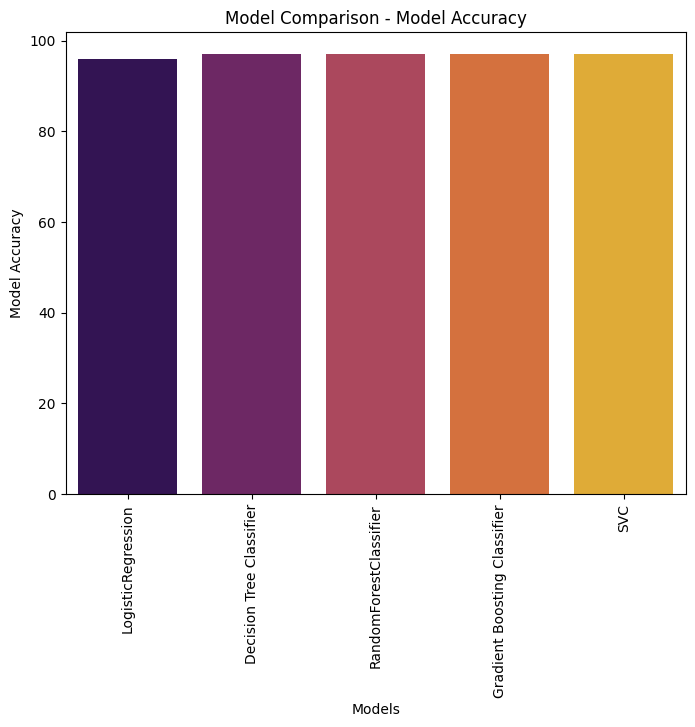

In [43]:
fig, ax = plt.subplots(figsize=(8,6))
sns.barplot(x=models.Model,y=models.Score, palette="inferno");
plt.xlabel("Models")
plt.ylabel("Model Accuracy")
plt.xticks(rotation=90)
plt.title("Model Comparison - Model Accuracy");

### Prediction

In [44]:
Cough_symptoms=0
Fever=0
Sore_throat=1
Shortness_of_breath=0
Headache=0
Sex=1
Known_contact=0

test = [Cough_symptoms, Fever, Sore_throat, Shortness_of_breath, Headache, Sex, Known_contact]

model = model_lg
pred = model.predict([test])
# print(pred)
if pred==1:
    print('Covid +ve')
else:
    print('Covid -ve')

Covid +ve


### Comparing the 5 models 'SVC/SVM' seems to be having more accuracy.